In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
%matplotlib notebook

1. Write a Python function (without using the scikit-learn library) to create a DataFrame containing the three
variables (points, assists, and rebounds) for 20 different basketball players.
Apply the K-means algorithm to identify clusters with K=1, 2, K=3, and K=4, using Euclidean distance:

    a. Create a scatter plot of the data points in blue.

    b. Plot the clusters with data points in different colors for K=1, 2, 3, and 4 in separate graphs.

    c. Create a plot showing the number of clusters on the x-axis and the Sum of Squared Errors (SSE) on the y-axis. Compute SSE for all iterations. Show the table of given data points against SSE for every iteration and use the total sum of SSE in the graph of K vs. SSE .

    d. Show the optimal value of K using the Elbow method and mark the same in the graph.

In [3]:
df=pd.read_csv('basketball.csv')
df.head()

,Points,Assists,Rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14


In [4]:
def euclidean(x,y):
    return np.sqrt(np.sum((x-y)**2,axis=1))

In [5]:
def manhattan(x,y):
    return np.sum(abs(x-y),axis=1)

In [6]:
def minkowski(x,y,c):
    return np.sum(abs(x-y)**c,axis=1)**(1/c)

In [7]:
def distance(op,x,y,c=3):
    if op=='eu':
        return euclidean(x,y)
    elif op=='man':
        return manhattan(x,y)
    elif op=='min':
        return minkowski(x,y,c)

<IPython.core.display.Javascript object>


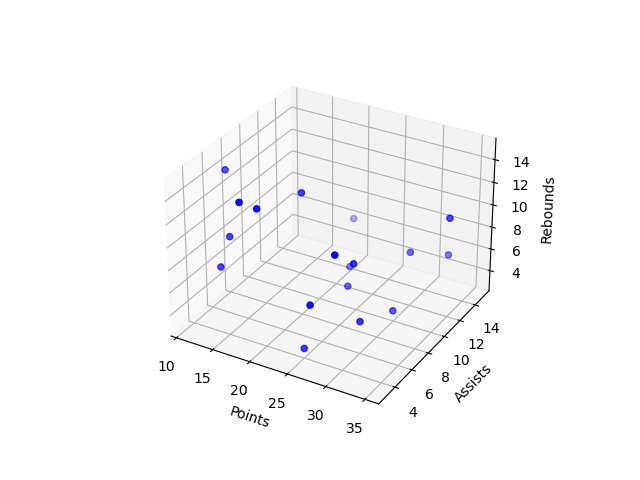

Text(0.5, 0, 'Rebounds')

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['Points'], df['Assists'], df['Rebounds'],c='b')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')

In [9]:
def initialize(data,K):
    indices = np.random.choice(len(data), K, replace=False)
    return data[indices]

In [10]:
def compute_clusters(data,centroids,op):
    clusters = {i: [] for i in range(len(centroids))}
    for point in data:
        clusters[np.argmin(distance(op,point,centroids))].append(point)
    return clusters

In [11]:
def update_centroids(clusters,K,dim):
    centroids=np.zeros((K, dim))
    for id in range(K):
        if len(clusters[id])>0:
            centroids[id]=np.mean(clusters[id],axis=0)       
    return centroids

In [12]:
def SSE(clusters, centroids):
    sse = 0
    for i, points in clusters.items():
        if len(points) > 0:
            sse += np.sum((points - centroids[i]) ** 2)
    return sse

In [13]:
def kmeans(K,epoch,data,op):
    dim=data.shape[1]
    centroids=initialize(data,K)
    for iter in range(epoch):
        clusters=compute_clusters(data,centroids,op)
        centroids=update_centroids(clusters,K,dim)
    sse = SSE(clusters, centroids)
    return clusters,centroids,sse

In [14]:
sse_vals_eu=[]

In [15]:
K=1
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'eu')
sse_vals_eu.append(sse)

<IPython.core.display.Javascript object>


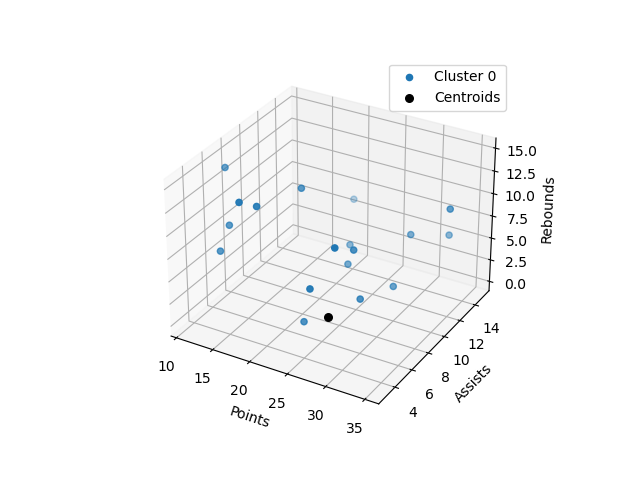

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
ax.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [17]:
K=2
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'eu')
sse_vals_eu.append(sse)

<IPython.core.display.Javascript object>


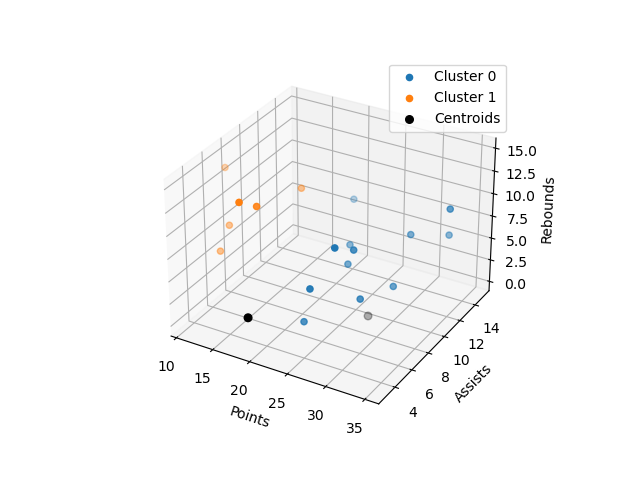

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [19]:
K=3
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'eu')
sse_vals_eu.append(sse)

<IPython.core.display.Javascript object>


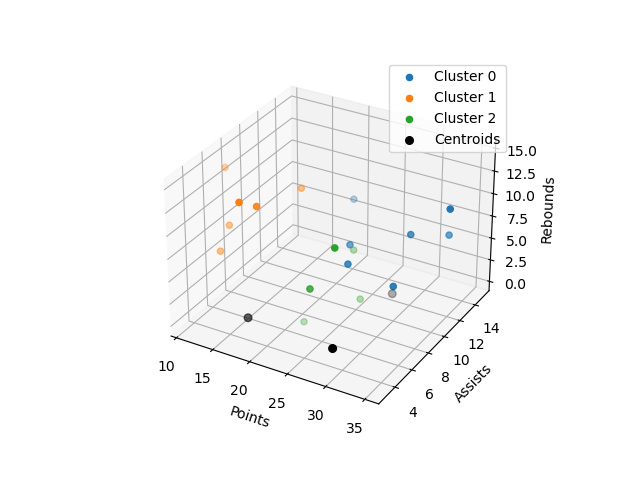

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [21]:
K=4
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'eu')
sse_vals_eu.append(sse)

<IPython.core.display.Javascript object>


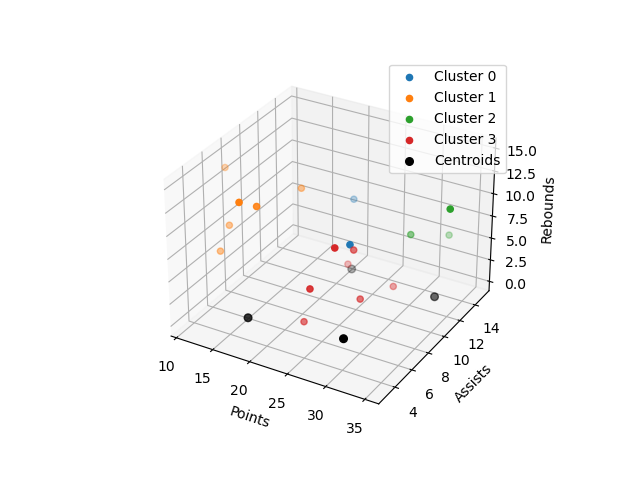

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [38]:
diff_sse = np.diff(sse_vals_eu)
optimal_k = np.argmax(diff_sse) + 1
print(f'The optimal value of K is: {optimal_k}')

The optimal value of K is: 2


[1347.5000000000002, 601.0, 457.8238095238096, 294.5714285714286]

<IPython.core.display.Javascript object>


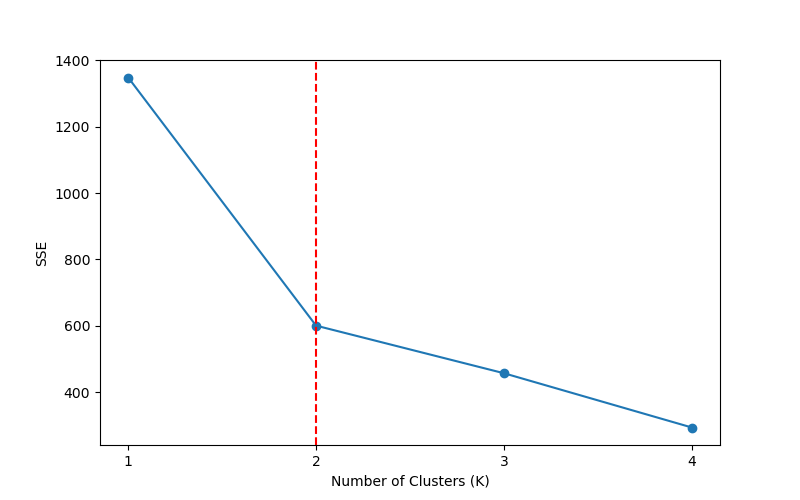

In [24]:
plt.figure(figsize=(8, 5))
plt.plot([1,2,3,4], sse_vals_eu, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.xticks([1,2,3,4])
plt.show()

2. Redo 1(a)-1(d) using Manhattan distance.

In [25]:
sse_vals_man=[]

In [26]:
K=1
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'man')
sse_vals_man.append(sse)

<IPython.core.display.Javascript object>


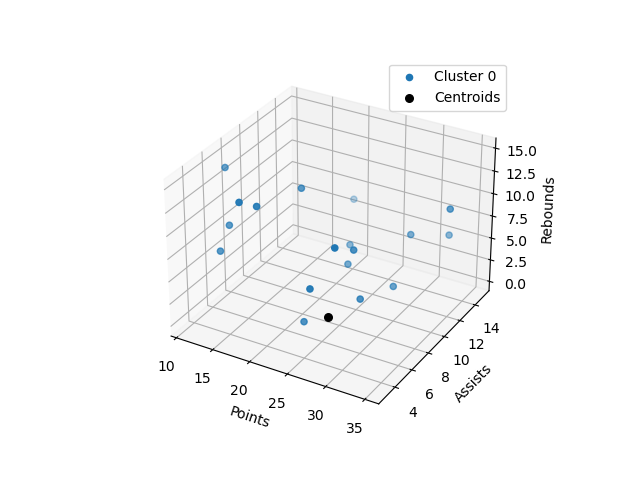

In [27]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
ax.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [28]:
K=2
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'man')
sse_vals_man.append(sse)

<IPython.core.display.Javascript object>


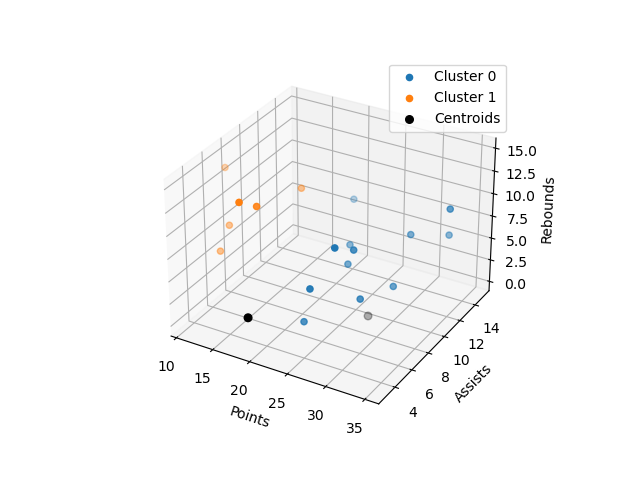

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
ax.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [30]:
K=3
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'man')
sse_vals_man.append(sse)

<IPython.core.display.Javascript object>


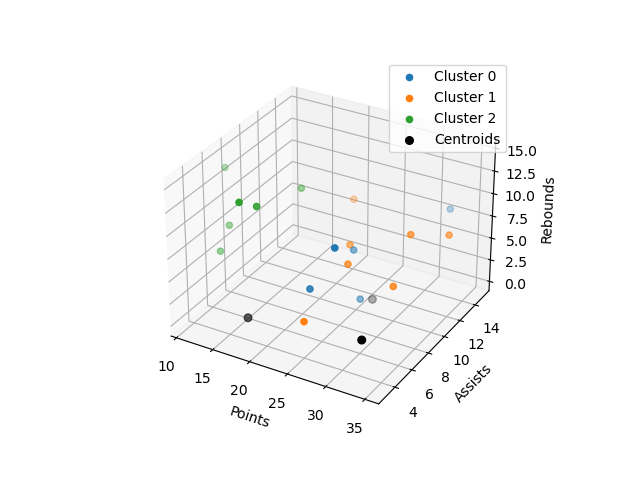

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
ax.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [32]:
K=4
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'man')
sse_vals_man.append(sse)

<IPython.core.display.Javascript object>


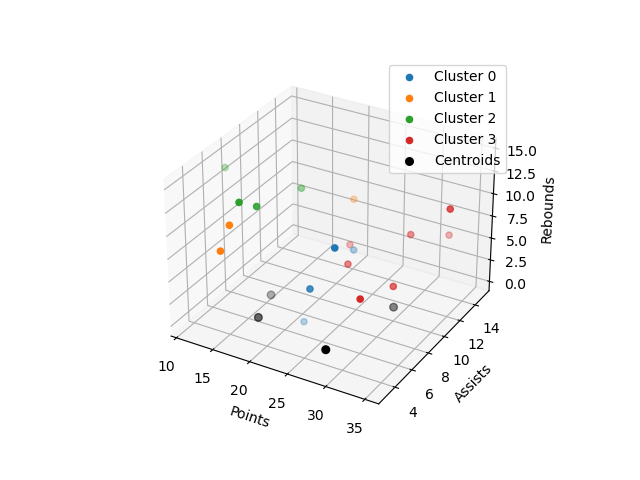

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
ax.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [1]:
diff_sse = np.diff(sse_vals_man)
diff_sse
# optimal_k = np.argmax(diff_sse) + 1
# print(f'The optimal value of K is: {optimal_k}')

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


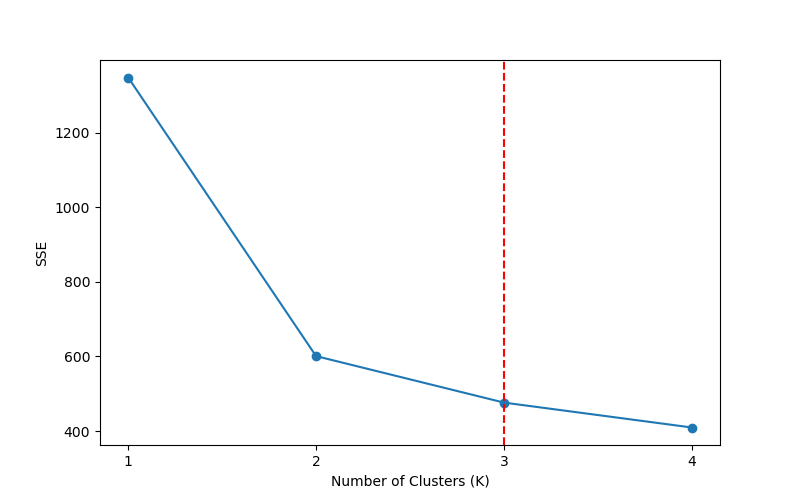

In [35]:
plt.figure(figsize=(8, 5))
plt.plot([1,2,3,4], sse_vals_man, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.xticks([1,2,3,4])
plt.show()

3. Redo 1(a)-1(d) using Minkowski distance.

In [40]:
sse_vals_min=[]

In [41]:
K=1
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'min')
sse_vals_min.append(sse)

<IPython.core.display.Javascript object>


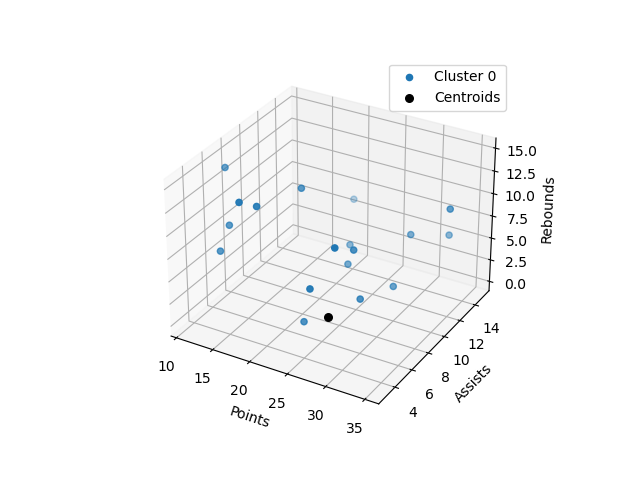

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in clusters:
    cluster_points = np.array(clusters[i])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],cluster_points[:, 2], label=f'Cluster {i}')
centroids_np = np.array(centroids)
ax.scatter(centroids_np[:, 0], centroids_np[:, 1], s=30, c='black',label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.legend()

In [ ]:
K=1
epoch=100
clusters,centroids,sse=kmeans(K,epoch,df.values,'min')
sse_vals_min.append(sse)